# Výsledné vnitřní účinky - přímý prut

Přímý, staticky určitě uložený prut na dvou podporách, vazba $A$ je rotační na levém konci prutu, vazba $B$ je obecná na pravém konci prutu. Prut má délku $a+b+c$. Od vazby $A$ do vzdálenosti $a$ působí liniové zatížení $\mathscr{q}$, v bodě $a+b$, měřeno od vazby $A$, působí síla $\mathscr{F}$ pod úhlem $\alpha$ (měřeno klasicky, proti směru hodinových ručiček od střednice prutu). Vazba $B$ je zatížena silovou dvojící $\mathscr{M}$.

In [1]:
struct Zadani
  a
  b
  c
  f
  alfa
  q
  m
  function Zadani(a,b,c,f,alfa,q,m)
    alfa=pi*alfa/180.
    new(a,b,c,f,alfa,q,m)
  end
end

In [2]:
struct Reakce
  fax
  fay
  fb
end

$a=1\ \mathrm{m}$, $b=0.5\ \mathrm{m}$, $c=0.5\ \mathrm{m}$, $\mathscr{F}=10000\ \mathrm{N}$, $\alpha=60^{\circ}$, $\mathscr{q}=5000\ \mathrm{N}\times\mathrm{m}^{-1}$, $\mathscr{M}=3000\ \mathrm{N}\times\mathrm{m}$

In [3]:
z=Zadani(1.,0.5,0.5,10000.,60.,5000.,3000.)

Zadani(1.0, 0.5, 0.5, 10000.0, 1.0471975511965976, 5000.0, 3000.0)

Soustava rovnic statické rovnováhy v maticovém tvaru,
$$ \left[\begin{array}{ccc} 1&0&0 \\ 1&1&0 \\ 0&0&a+b+c \end{array}\right] \left[\begin{array}{c} F_{Ax} \\ F_{Ay} \\ F_B \end{array}\right]= \left[\begin{array}{c} \mathscr{F}\cos\alpha \\ \mathscr{q}a+\mathscr{F}\sin\alpha \\ \mathscr{M}+\mathscr{F}\sin\alpha(a+b+c)+\mathscr{q}a^2/2 \end{array}\right]. $$ 

In [4]:
A=[1. 0. 0.;0. 1. 1.;0. 0. z.a+z.b+z.c]

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  1.0
 0.0  0.0  2.0

In [5]:
b=[z.f*cos(z.alfa);z.q*z.a+z.f*sin(z.alfa);z.m+z.f*sin(z.alfa)*(z.a+z.b+z.c)+z.q*z.a^2/2.]

3-element Array{Float64,1}:
  5000.0
 13660.3
 22820.5

Řešení soustavy rovnic.

In [6]:
x=A\b
r=Reakce(x...)

Reakce(5000.000000000001, 2250.0, 11410.254037844386)

Výsledné vnitřní účinky

In [7]:
x=linspace(0.,z.a+z.b+z.c,100)

0.0:0.020202020202020204:2.0

In [8]:
using Plots

In [9]:
function N(x,z::Zadani,r::Reakce)
    if x>=0 && x<=z.a
        return r.fax
    elseif x>z.a && x<=z.a+z.b
        return r.fax
    else x>z.a+z.b+z.c
        return r.fax-z.f*cos(z.alfa)
    end    
end

N (generic function with 1 method)

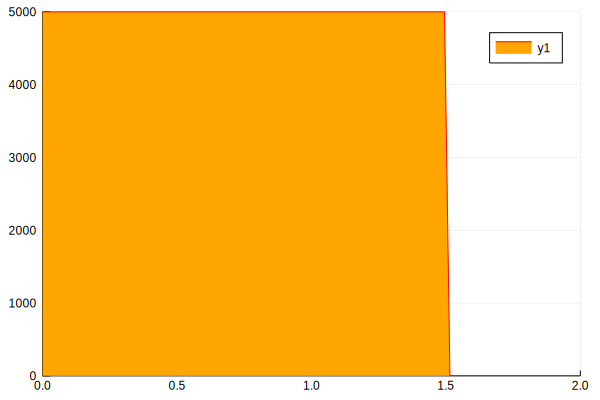

In [10]:
plot(x,x->N(x,z,r),color=:red,fill=(1,:orange))

In [11]:
function T(x,z::Zadani,r::Reakce)
    if x>=0 && x<=z.a
        return r.fay-z.q*x
    elseif x>z.a && x<=z.a+z.b
        return r.fay-z.q*z.a
    else x>z.a+z.b+z.c
        return r.fay-z.q*z.a-z.f*sin(z.alfa)
    end    
end

T (generic function with 1 method)

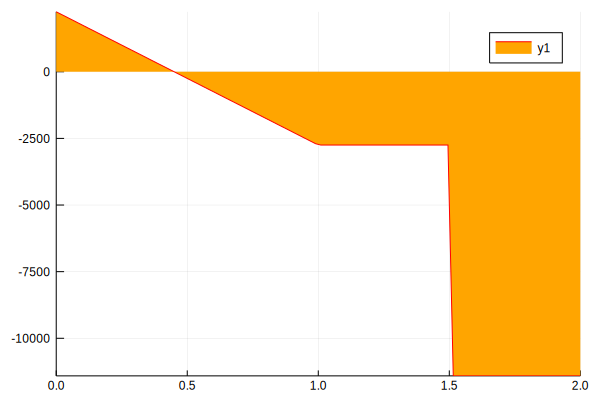

In [12]:
plot(x,x->T(x,z,r),color=:red,fill=(1,:orange))

In [13]:
function M(x,z::Zadani,r::Reakce)
    if x>=0 && x<=z.a
        x1=x
        return r.fay*x1-z.q*x1^2/2
    elseif x>z.a && x<=z.a+z.b
        x2=x-z.a
        return r.fay*(x2+z.a)-z.q*z.a*(z.a/2.+x2)
    else x>z.a+z.b+z.c
        x3=x-z.a-z.b
        return r.fay*(x3+z.a+z.b)-z.q*z.a*(z.a/2.+z.b+x3)-z.f*sin(z.alfa)*x3
    end    
end

M (generic function with 1 method)

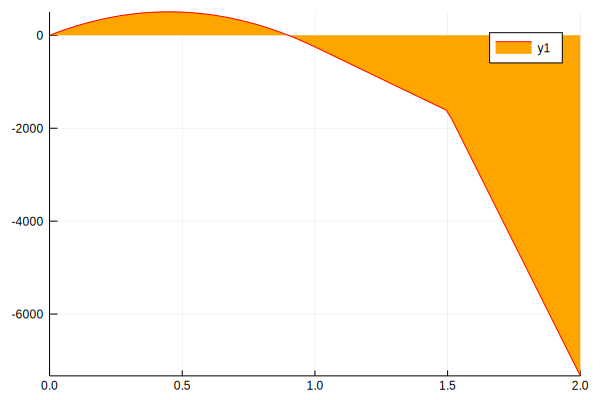

In [14]:
plot(x,x->M(x,z,r),color=:red,fill=(1,:orange))